# Active selection of source

This notebook describes analyses of an experiment variant in which participants were allowed, on each trial, to select the source from which they wanted to receive a label. It was designed to assess whether (a) learners would increasingly prefer to select one source over another and (b) the category boundary would shift reliably toward the closer source.

## Load data

In this earlier experiment, data were analyzed before we adopted JuPyteR notebooks. I pre-processed the data in Excel and native R, then saved the data objects. This block reads in the data.

In [1]:
allpars <- read.csv("allpars.csv", header = T) #Initial and final estimates of boundary from grid
rating <- read.csv("rating.csv", header = T)   #Ratings of faces following classification task
sourcesel <- read.csv("sourcesel.csv", header = T) #Source-selection data

In [30]:
head(allpars)

axlab,farsource,sno,t1int,t1slope,t1bound,t2int,t2slope,t2bound,bshift,closepos,Zclosepos,cond
SP-C,C,SP-C_C1,11.370928,-0.06685196,170.0912,17.552066,-0.08995508,195.12035,25.02918,25.02918,0.9061107,C
SP-C,C,SP-C_C10,643.490304,-4.15156951,154.9993,351.382156,-2.06695386,170.00000,15.00072,15.00072,0.5379886,C
SP-C,C,SP-C_C2,6.945626,-0.04476881,155.1443,3.603997,-0.03798525,94.87886,-60.26547,-60.26547,-2.2248619,C
SP-C,C,SP-C_C3,26.870491,-0.16794057,160.0000,7.166546,-0.05523562,129.74500,-30.25500,-30.25500,-1.1232458,C
SP-C,C,SP-C_C4,23.511679,-0.16794057,140.0000,441.814737,-2.00824880,220.00000,80.00000,80.00000,2.9239646,C
SP-C,C,SP-C_C5,26.870491,-0.16794057,160.0000,7.571491,-0.04045877,187.14092,27.14092,27.14092,0.9836278,C


In this early study, boundary shift was encoded so that positive numbers indicate a shift toward the closer source. In all other studies, however, we coded so that positive numbers indicate a shift toward the *far* source. So, I will flip the direction and rename the fields correspondingly:

In [32]:
allpars$closepos <- -1 * allpars$closepos
allpars$Zclosepos <- -1 * allpars$Zclosepos
names(allpars)[11:12] <- c("farpos", "Zfarpos")


In [33]:
head(allpars)

axlab,farsource,sno,t1int,t1slope,t1bound,t2int,t2slope,t2bound,bshift,farpos,Zfarpos,cond
SP-C,C,SP-C_C1,11.370928,-0.06685196,170.0912,17.552066,-0.08995508,195.12035,25.02918,-25.02918,-0.9061107,C
SP-C,C,SP-C_C10,643.490304,-4.15156951,154.9993,351.382156,-2.06695386,170.00000,15.00072,-15.00072,-0.5379886,C
SP-C,C,SP-C_C2,6.945626,-0.04476881,155.1443,3.603997,-0.03798525,94.87886,-60.26547,60.26547,2.2248619,C
SP-C,C,SP-C_C3,26.870491,-0.16794057,160.0000,7.166546,-0.05523562,129.74500,-30.25500,30.25500,1.1232458,C
SP-C,C,SP-C_C4,23.511679,-0.16794057,140.0000,441.814737,-2.00824880,220.00000,80.00000,-80.00000,-2.9239646,C
SP-C,C,SP-C_C5,26.870491,-0.16794057,160.0000,7.571491,-0.04045877,187.14092,27.14092,-27.14092,-0.9836278,C


In [38]:
#Rename sno column to have the same label as other data files (SID)
names(allpars)[3] <- "SID"

## Define functions

In [2]:
zscore <- function(v) {(v-mean(v))/sqrt(var(v))}

## Source selection

We first assessed whether people grew more likely to choose the source that agreed with them as the learnin phase of the experiment progressed. In preprocessing we divided the 301 learning trials into blocks of 50 (51 in final block), and for each block computed the proportion of trials for which the participant selected the source with the closer boundary. The questions are (1) are people more likely to choose the closer source on average across all trials, (2) do people grow more likely to choose the closer source over time and (3) do people who are more likely to choose the closer source *less* likely to shift their boundary toward the far source.

First let's look at the mean proportion of "closer source" choices made by all subjects:

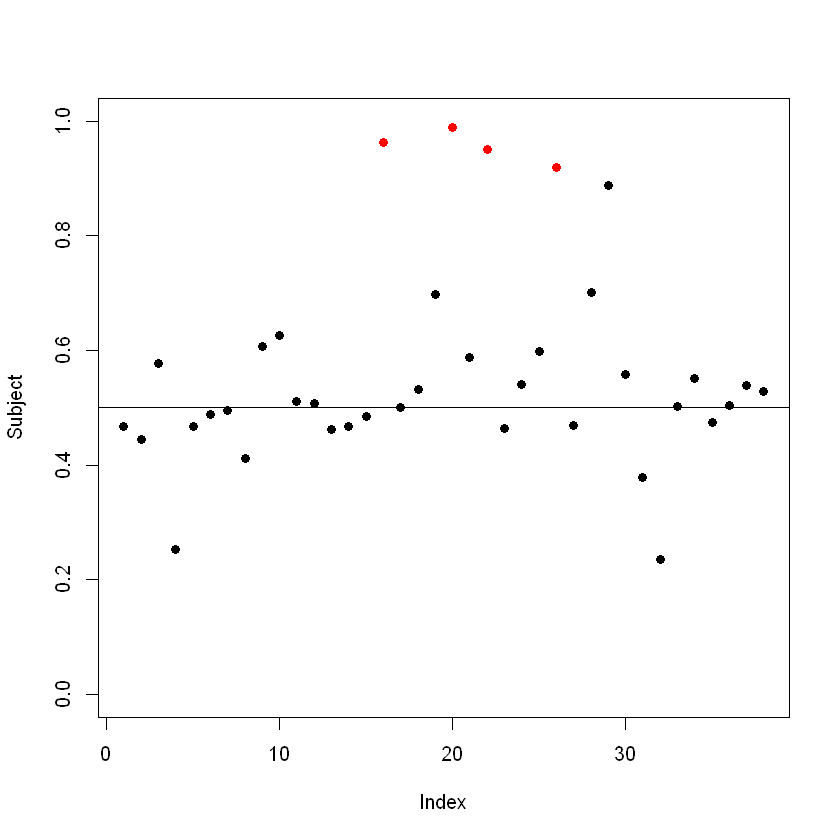

In [92]:
mnprop <- rowMeans(sourcesel[,2:7]) #Vector of mean proportions
plot(mnprop, ylim = c(0,1), pch=16, col=as.numeric(abs(zscore(mnprop))>2)+1, ylab="Subject")
abline(h=.5)

In [93]:
sort(zscore(mnprop))

[1] -1.85451249 -1.75788305 -1.04245359 -0.84956637 -0.66485549 -0.57082762
 [7] -0.55150174 -0.53217585 -0.53180420 -0.53143255 -0.53031759 -0.49389573
[13] -0.43628972 -0.41993705 -0.38054197 -0.34412010 -0.34226185 -0.32479422
[19] -0.30955650 -0.28539914 -0.19062797 -0.17241703 -0.13413691 -0.11927084
[25] -0.05794832 -0.02375637  0.08662418  0.14906166  0.20480941  0.26167212
[31]  0.37093771  0.77343646  0.79536391  1.85011135  2.03742379  2.20689695
[37]  2.28234224  2.43360447

Figure shows, across all trials, the proportion of times each student selected the source with the closer boundary. Red dots indicate outliers greater than 2 standard deviations from the mean. Five participants almost always selected the closer source; four of these count as outliers by our inclusion criteria.

We next consider whether the mean proportion differs reliably from chance (0.5) with and without the outliers.

In [13]:
#With all data:
t.test(mnprop-.5)


	One Sample t-test

data:  mnprop - 0.5
t = 2.174, df = 37, p-value = 0.03618
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 0.00421652 0.11982545
sample estimates:
 mean of x 
0.06202098 


On average all subjects choose the closer source 56% of the time, reliably above chance. This appears to be due solely to the fours outliers, however:

In [15]:
mnprop.noo <- mnprop[abs(zscore(mnprop)) <= 2.0]
t.test(mnprop.noo-.5)


	One Sample t-test

data:  mnprop.noo - 0.5
t = 0.78443, df = 33, p-value = 0.4384
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.02497948  0.05632897
sample estimates:
 mean of x 
0.01567474 


With the four outliers removed, mean proportion selecting closer source is 51.6%, not reliably different from chance. Does this mean that 4-5 participants showed "confirmation bias" and the majority did not? To answer this question, we looked at whether the probability of selecting the closer source increased over the course of learning. We computed the probability of selecting the closer source for each subject in each of 6 successive blocks of 50 trials.

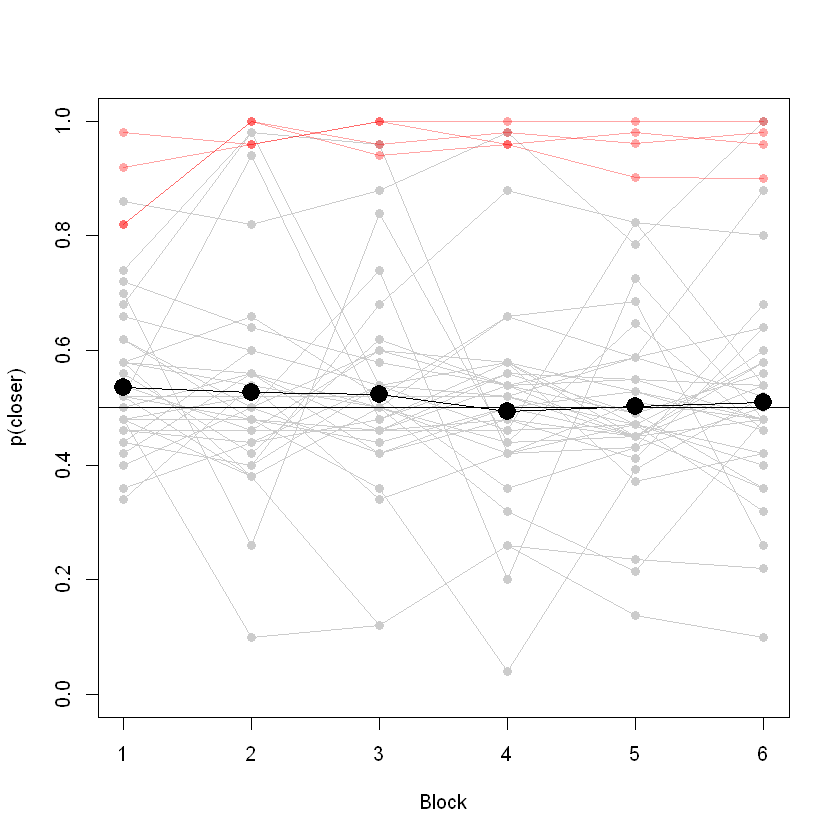

In [26]:
plot(0,0,type ="n", ylim = c(0,1), xlim = c(1,6), ylab="p(closer)", xlab="Block")
tmp <- sourcesel[abs(zscore(mnprop)) <= 2.0,2:7]
tmpout <- sourcesel[abs(zscore(mnprop)) > 2.0,2:7]
for(i in c(1:dim(tmp)[1])) lines(c(1:6), tmp[i,], type = "o", pch=16, col=gray(.8))
for(i in c(1:dim(tmpout)[1])) lines(c(1:6), tmpout[i,], type = "o", pch=16, col=hsv(0,1,1,.35))

lines(c(1:6), colMeans(tmp), pch=16, cex=2, type="o")
abline(h=.5)

This Figure shows mean probability of choosing the closer source for each subject at each block og 50 trials. The four outliers are shown in red, all other subjects in gray. Black circles/lines show the mean across subjects excluding outliers. Note:

- Mean is near chance across all blocks
- Mean probability does not increase over time as people learn more about the sources
- The four outliers choose the closer source from the very first block--so likely just stick with their first choice.

**Note:** Sources provide different labels for 65 of the 301 items, or about 21%, so in the first 50 trials the two sources differ on an expected 10 trials. Outlying subjects chose the far source on, at most, 20% of the trials in the first block--so they have contradictory evidence from the far source on about 2 trials. It seems unlikely that this is enough to generate a confirmation bias in these participants.

We can check whether the probability differs from chance in the first block where the mean probability is highest:

In [34]:
t.test(tmp[,1]-.5)


	One Sample t-test

data:  tmp[, 1] - 0.5
t = 1.8665, df = 33, p-value = 0.07088
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.003283092  0.076224268
sample estimates:
 mean of x 
0.03647059 


For this contrast $t(33) =~ 1.87$, p = n.s. All other tests also not significant.

## Relationship between source selection and boundary shift

If boundary-shift data are influenced by biased information selection as suggested by classic confirmation bias, then subjects who are more likely to choose the closer source should also show less shift toward the far source. We therefore looked at the coorelation between the probability of choosing the closer source and the amount of shift.

In [73]:
tmp <- allpars[allpars$farsource!="C",] #Discard controls since they did not get labels from sources
exp <- merge(tmp, sourcesel, by="SID") #Merge source-selection and boundary shift data
head(exp)

SID,axlab,farsource,t1int,t1slope,t1bound,t2int,t2slope,t2bound,bshift,...,Zfarpos,cond,B1,B2,B3,B4,B5,B6,Group.1,All
SP-C_L1,SP-C,L,31.247262,-0.18937734,165.0000,18.482418,-0.12321612,150.0000,-15.00000120,...,0.56326945,E,0.48,0.52,0.52,0.36,0.4313725,0.50,SP-C_L1,0.4684385
SP-C_L10,SP-C,L,11.000974,-0.08149840,134.9839,7.595619,-0.05851355,129.8096,-5.17433505,...,0.20259160,E,0.58,0.54,0.34,0.42,0.4705882,0.32,SP-C_L10,0.4451827
SP-C_L2,SP-C,L,15.060435,-0.08858359,170.0138,26.870491,-0.16794057,160.0000,-10.01382421,...,0.38023823,E,0.44,0.40,0.54,0.46,0.8235294,0.80,SP-C_L2,0.5780731
SP-C_L3,SP-C,L,601.980550,-4.15156952,145.0007,8.194707,-0.05653345,144.9533,-0.04745426,...,0.01439547,E,0.52,0.38,0.12,0.26,0.1372549,0.10,SP-C_L3,0.2524917
SP-C_L4,SP-C,L,9.429957,-0.05890858,160.0778,2.588508,-0.01078987,239.9017,79.82385083,...,-2.91749844,E,0.52,0.48,0.46,0.46,0.4705882,0.42,SP-C_L4,0.4684385
SP-C_L5,SP-C,L,311.533714,-2.07689143,150.0000,4.178769,-0.03134237,133.3265,-16.67350361,...,0.62469991,E,0.36,0.44,0.48,0.56,0.5490196,0.54,SP-C_L5,0.4883721


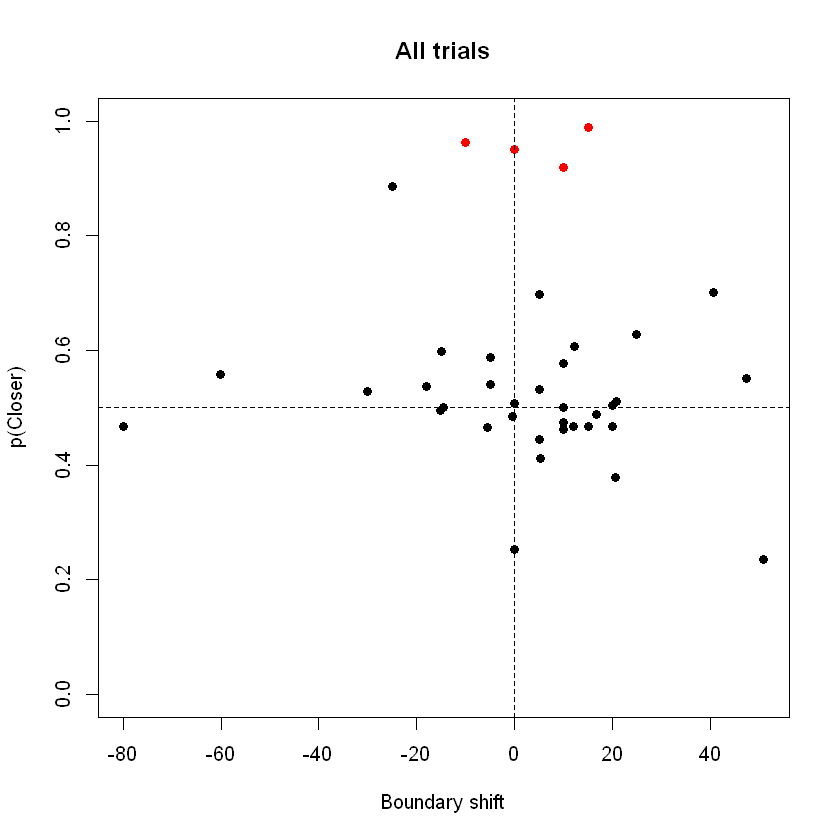

In [91]:
plot(exp$farpos, exp$All, pch=16, col = as.numeric(abs(zscore(exp$All)) > 2.0)+1,
     ylab="p(Closer)", xlab="Boundary shift", main="All trials", ylim = c(0,1))
abline(h=.5, v=0, lty=2)


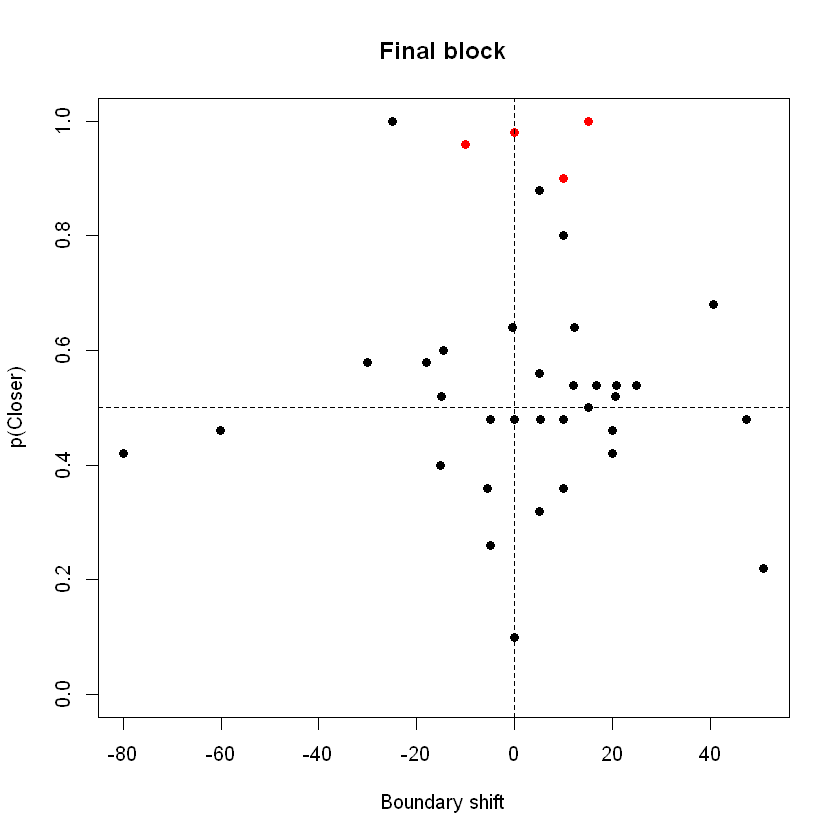

In [90]:
plot(exp$farpos, exp$B6, pch=16, col = as.numeric(abs(zscore(exp$All)) > 2.0)+1,
     ylab="p(Closer)", xlab="Boundary shift", main="Final block", ylim = c(0,1))
abline(h=.5, v=0, lty=2)


Figure shows probability of selecting the closer source plotted against the boundary shift. Positive numbers indicate a boundary shift toward the *far* source. If boundary shift was influenced by information selection as predicted by confirmation bias, these variable should show a negative correlation. Instead no correlation is observed:

In [76]:
summary(lm(farpos~All, data=exp))


Call:
lm(formula = farpos ~ All, data = exp)

Residuals:
    Min      1Q  Median      3Q     Max 
-83.775  -7.850   3.257  12.745  44.474 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)    10.15      13.77   0.737    0.466
All           -13.24      23.42  -0.565    0.575

Residual standard error: 25.05 on 36 degrees of freedom
Multiple R-squared:  0.008804,	Adjusted R-squared:  -0.01873 
F-statistic: 0.3197 on 1 and 36 DF,  p-value: 0.5753


In [77]:
summary(lm(farpos~B6, data=exp))


Call:
lm(formula = farpos ~ B6, data = exp)

Residuals:
    Min      1Q  Median      3Q     Max 
-83.142  -9.113   3.010  13.424  46.752 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)    5.178     11.443   0.452    0.654
B6            -4.428     19.200  -0.231    0.819

Residual standard error: 25.14 on 36 degrees of freedom
Multiple R-squared:  0.001475,	Adjusted R-squared:  -0.02626 
F-statistic: 0.05319 on 1 and 36 DF,  p-value: 0.8189


The outlying subjects who almost always chose the closer source did not differ from the rest of the group in their boundary shift, while the two participants who showed a strong shift toward the closer source showed approximately chance likelihood of choosing the closer versus the farther source in both the final block and across all trials. So, there is no evidence that the direction and amount of boundary shift is related to the participants' proability of choosing the closer source.

## Assessing boundary shift

Finally, we considered how the boundary shifted in this experiment, using the same approach as in the main paper. First we checked for outliers in the initial boundary and in the amount of boundary shift:

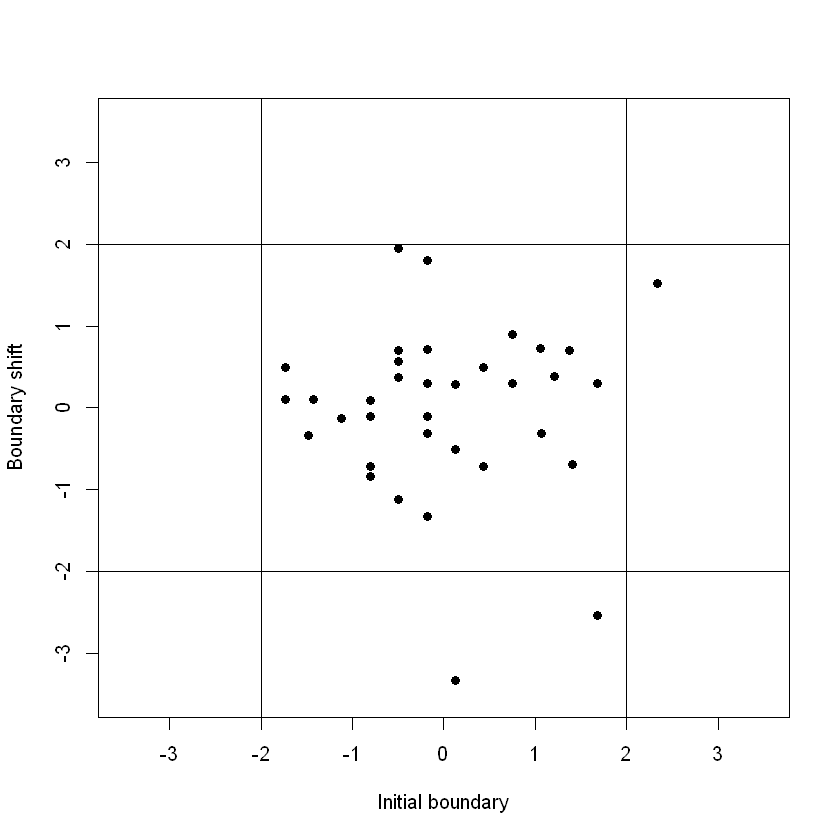

In [78]:
plot(zscore(exp$t1bound), zscore(exp$farpos), xlim = c(-3.5,3.5), pch=16,
     ylim = c(-3.5,3.5), xlab = "Initial boundary", ylab="Boundary shift")
abline(h=c(-2,2), v=c(-2,2))

Remove the three outliers:

In [79]:
exp.noo <- exp[abs(zscore(exp$t1bound)) <= 2.0 & abs(zscore(exp$farpos)) <= 2.0,]
dim(exp.noo)

[1] 35 21

Does the boundary shift differ from zero, and if so, in what direction?

In [72]:
t.test(tmp.noo$farpos)


	One Sample t-test

data:  tmp.noo$farpos
t = 1.968, df = 34, p-value = 0.05726
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.1887101 11.7535384
sample estimates:
mean of x 
 5.782414 


There is a marginally significant shift toward the *far* source, similar to Experiment 1 but smaller in magnitude. Does the experimental condition differ from the control condition?

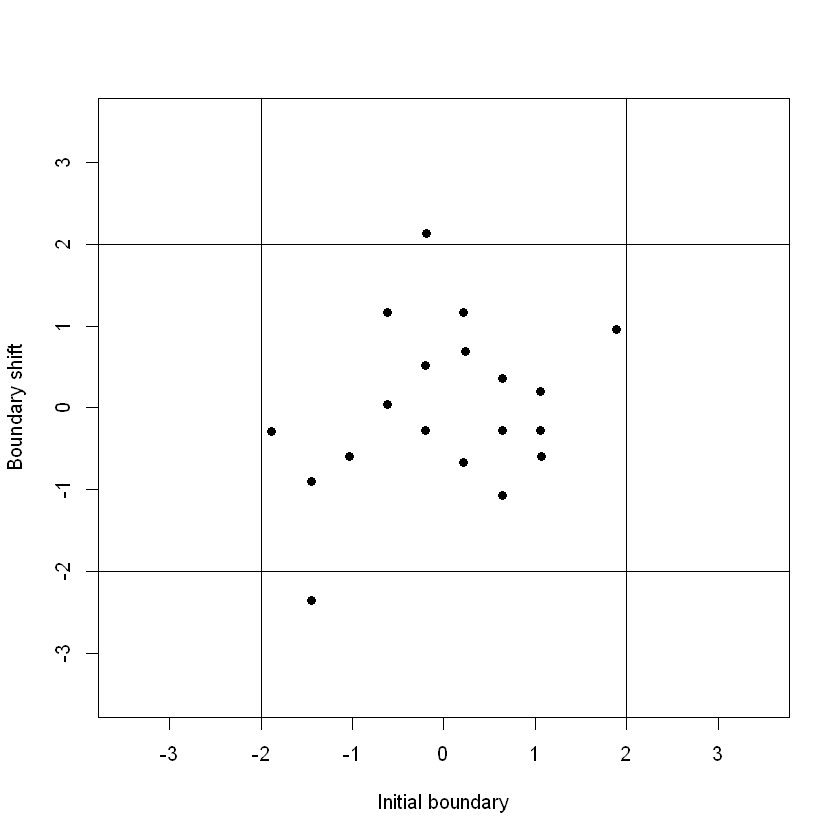

In [81]:
plot(zscore(cntrl$t1bound), zscore(cntrl$farpos), xlim = c(-3.5,3.5), pch=16,
     ylim = c(-3.5,3.5), xlab = "Initial boundary", ylab="Boundary shift")
abline(h=c(-2,2), v=c(-2,2))

Remove outliers from control sample:

In [82]:
cntrl.noo <- cntrl[abs(zscore(cntrl$t1bound)) <= 2.0 & abs(zscore(cntrl$farpos)) <= 2.0,]
dim(cntrl.noo)

[1] 17 13

In [84]:
t.test(cntrl.noo$farpos, exp.noo$farpos)


	Welch Two Sample t-test

data:  cntrl.noo$farpos and exp.noo$farpos
t = -1.9346, df = 25.925, p-value = 0.06402
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -24.4218888   0.7418541
sample estimates:
mean of x mean of y 
-6.057603  5.782414 


Again, marginally significant difference between control and experimental conditions. 

## Summary

On average people did not preferntially select the closer source and did not grow increasingly likely to do so over time. The few individuals who did preferentially select the closer source did not differ from other participants in their boundary-shift behavior. The observed boundary shift was smaller than in Experiment 1, but if anything boundaries still shifted toward the far source. The smaller degree of shift is consistent with the fact that participants received only half as many labels as in the original experiment. In general this study provides little support to the hypothesis that Experiment 1 results arise from biased information selection.